## Projet 9 : Librairie Lapage


## 1 : Exploration et prépation des données

#### 1.1 Chargement et exploration des données

In [4]:
#import des fichiers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


customers = pd.read_csv("customers.csv", sep=";")
products = pd.read_csv("products.csv", sep=";")
transactions = pd.read_csv("Transactions.csv", sep=";")

print(customers.head())
print(products.head())
print(transactions.head())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943
  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0
  id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1663083399.py:11: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv("Transactions.csv", sep=";")


In [5]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2

In [6]:
#suppression des valeurs nulles
print(transactions.isnull().sum())

id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64


In [7]:
transactions = transactions.dropna()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 26.2+ MB


In [8]:
print("Nombre de doublons dans transactions : {}".format(transactions.duplicated().sum()))
print("Nombre de doublons dans products : {}".format(products.duplicated().sum()))
print("Nombre de doublons dans customers : {}".format(customers.duplicated().sum()))

Nombre de doublons dans transactions : 0
Nombre de doublons dans products : 0
Nombre de doublons dans customers : 0


### 1.2 : Préparation des données

In [10]:
#Calcul age des clients
from datetime import datetime

annee_actuelle = datetime.now().year
customers["age"] = annee_actuelle - customers["birth"]

print(customers[["birth", "age"]].head())

   birth  age
0   1967   58
1   1975   50
2   1984   41
3   1962   63
4   1943   82


In [11]:
#Creation d'une periode mois
transactions["date"] = pd.to_datetime(transactions["date"])
transactions["mois"] = transactions["date"].dt.to_period("M")
transactions["nom_jour"]= transactions["date"].dt.day_name()
transactions


,id_prod,date,session_id,client_id,mois,nom_jour
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03,Monday
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03,Monday
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03,Monday
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03,Monday
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03,Monday
...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023-02,Tuesday
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023-02,Tuesday
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023-02,Tuesday
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023-02,Tuesday


In [12]:
#Fusion des fichiers
df = transactions.merge(products, on="id_prod", how="left")

df = df.merge(customers, on="client_id", how="left")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   mois        687534 non-null  period[M]     
 5   nom_jour    687534 non-null  object        
 6   price       687534 non-null  float64       
 7   categ       687534 non-null  int64         
 8   sex         687534 non-null  object        
 9   birth       687534 non-null  int64         
 10  age         687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 57.7+ MB


,id_prod,date,session_id,client_id,mois,nom_jour,price,categ,sex,birth,age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021-03,Monday,11.99,0,f,1967,58
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021-03,Monday,19.37,0,m,1960,65
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021-03,Monday,4.50,0,m,1988,37
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021-03,Monday,6.55,0,f,1989,36
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021-03,Monday,16.49,0,f,1956,69


In [13]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df.describe()

,date,price,categ,birth,age
count,687534,687534.000000,687534.000000,687534.000000,687534.000000
mean,2022-03-01 21:24:00.618519296,17.493918,0.448789,1977.817391,47.182609
min,2021-03-01 00:01:07.843138,0.620000,0.000000,1929.000000,21.000000
25%,2021-09-10 10:35:20.642323456,8.990000,0.000000,1970.000000,38.000000
50%,2022-02-27 06:50:25.400120064,13.990000,0.000000,1980.000000,45.000000
75%,2022-08-28 22:16:49.841665536,19.080000,1.000000,1987.000000,55.000000
max,2023-02-28 23:58:30.792755,300.000000,2.000000,2004.000000,96.000000
std,NaN,18.238337,0.594563,13.607935,13.607935


#### Les dates, dates de naissances et ages sont cohérentes. pas de valeurs anormales. une question sur le prix max des livres.

In [15]:
#Vérification des prix les plus élevés si incohérent
df_idprod = df.groupby("id_prod")["price"].mean().reset_index()
df_idprod.sort_values("price",ascending=False).head(10)
#Les prix sont élévés mais ne sont pas une erreur.

,id_prod,price
3141,2_2,300.00
3241,2_76,254.44
3095,2_158,247.22
3105,2_167,236.99
3192,2_30,233.54
3059,2_125,231.99
3104,2_166,230.04
3203,2_40,228.11
3173,2_228,225.17
3202,2_4,222.97


In [16]:
#Liste des valeurs uniques pour categ et sex :
colonnes = ["categ", "sex"]
for col in colonnes:
    print(f"Valeurs uniques pour {col} :")
    print(df[col].unique())


Valeurs uniques pour categ :
[0 1 2]
Valeurs uniques pour sex :
['f' 'm']


## 2 : Analyse des indicateurs de vente

### 2.1 : Evolution chiffre d'affaires avec moyenne mobile

In [19]:
df.set_index("date", inplace=True)
df

,id_prod,session_id,client_id,mois,nom_jour,price,categ,sex,birth,age
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,2021-03,Monday,11.99,0,f,1967,58
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,2021-03,Monday,19.37,0,m,1960,65
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,2021-03,Monday,4.50,0,m,1988,37
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,2021-03,Monday,6.55,0,f,1989,36
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,2021-03,Monday,16.49,0,f,1956,69
...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,2023-02,Tuesday,21.92,1,f,1996,29
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,2023-02,Tuesday,48.99,2,f,1994,31
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,2023-02,Tuesday,26.99,1,f,1985,40


In [20]:
ca_mensuel = df["price"].resample("ME").sum()

In [21]:
mm_3mois = ca_mensuel.rolling(window=3).mean()
mm_12mois = ca_mensuel.rolling(window=12).mean()
print("CA mensuel :")
print(ca_mensuel)
print("\nMoyenne mobile sur 3 mois :")
print(mm_3mois)

CA mensuel :
date
2021-03-31    482440.61
2021-04-30    476109.30
2021-05-31    492943.47
2021-06-30    484088.56
2021-07-31    482835.40
2021-08-31    482284.79
2021-09-30    507240.68
2021-10-31    494733.16
2021-11-30    516167.73
2021-12-31    525917.28
2022-01-31    525338.99
2022-02-28    535571.50
2022-03-31    515456.53
2022-04-30    492998.94
2022-05-31    517132.60
2022-06-30    496016.12
2022-07-31    510783.12
2022-08-31    506467.27
2022-09-30    494114.53
2022-10-31    507917.77
2022-11-30    496664.94
2022-12-31    510219.50
2023-01-31    517540.55
2023-02-28    456679.76
Freq: ME, Name: price, dtype: float64

Moyenne mobile sur 3 mois :
date
2021-03-31              NaN
2021-04-30              NaN
2021-05-31    483831.126667
2021-06-30    484380.443333
2021-07-31    486622.476667
2021-08-31    483069.583333
2021-09-30    490786.956667
2021-10-31    494752.876667
2021-11-30    506047.190000
2021-12-31    512272.723333
2022-01-31    522474.666667
2022-02-28    528942.59000

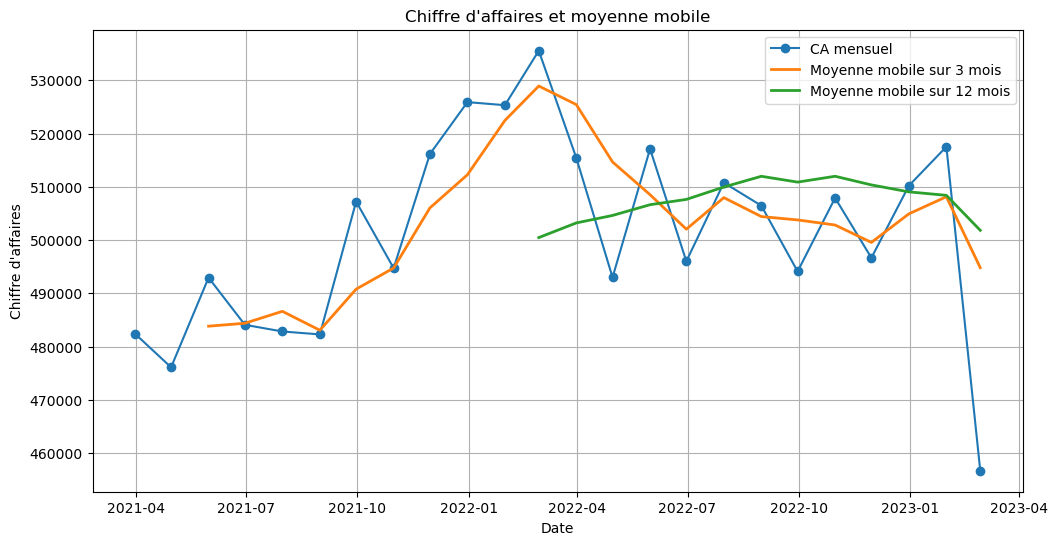

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(ca_mensuel.index, ca_mensuel, label="CA mensuel", marker="o")
plt.plot(mm_3mois.index, mm_3mois, label="Moyenne mobile sur 3 mois", linewidth=2)
plt.plot(mm_12mois.index, mm_12mois, label="Moyenne mobile sur 12 mois", linewidth=2)
plt.title("Chiffre d'affaires et moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
ca_quotidien = df["price"].resample("D").sum()
ca_quotidien

date
2021-03-01    16565.22
2021-03-02    15486.45
2021-03-03    15198.69
2021-03-04    15196.07
2021-03-05    17471.37
                ...   
2023-02-24    15207.89
2023-02-25    15761.25
2023-02-26    16304.72
2023-02-27    19170.81
2023-02-28    18105.15
Freq: D, Name: price, Length: 730, dtype: float64

In [24]:
mm_7jours = ca_quotidien.rolling(window=7).mean()
mm_28jours = ca_quotidien.rolling(window=28).mean()
mm_84jours = ca_quotidien.rolling(window=84).mean()


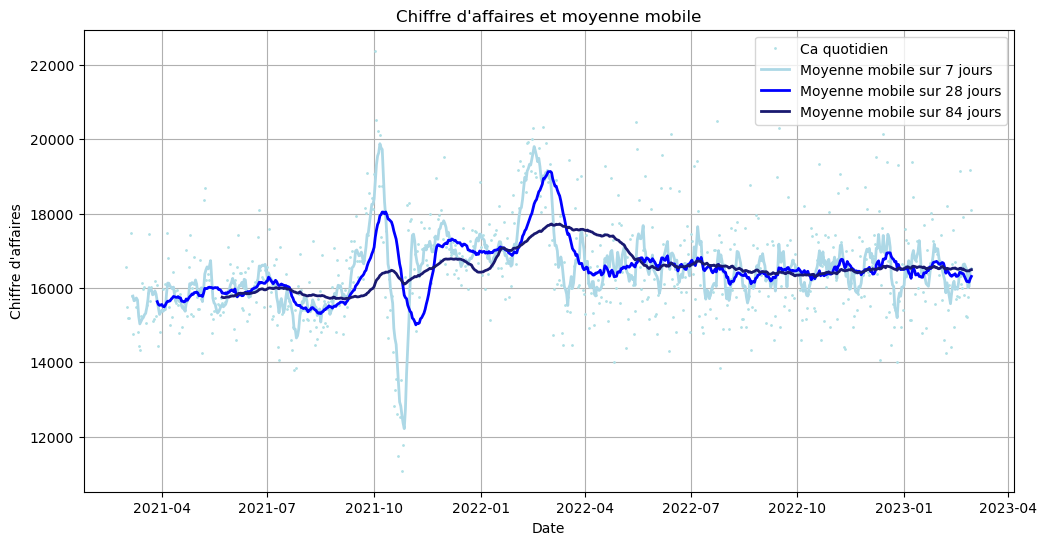

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(ca_quotidien.index, ca_quotidien, label="Ca quotidien", linestyle="None", marker="o", markersize= 1, color = "powderblue")
plt.plot(mm_7jours.index, mm_7jours, label="Moyenne mobile sur 7 jours", linewidth=2, color ="lightblue" )
plt.plot(mm_28jours.index, mm_28jours, label="Moyenne mobile sur 28 jours", linewidth=2, color = "blue")
plt.plot(mm_84jours.index, mm_84jours, label="Moyenne mobile sur 84 jours", linewidth=2, color = "midnightblue")
plt.title("Chiffre d'affaires et moyenne mobile")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()

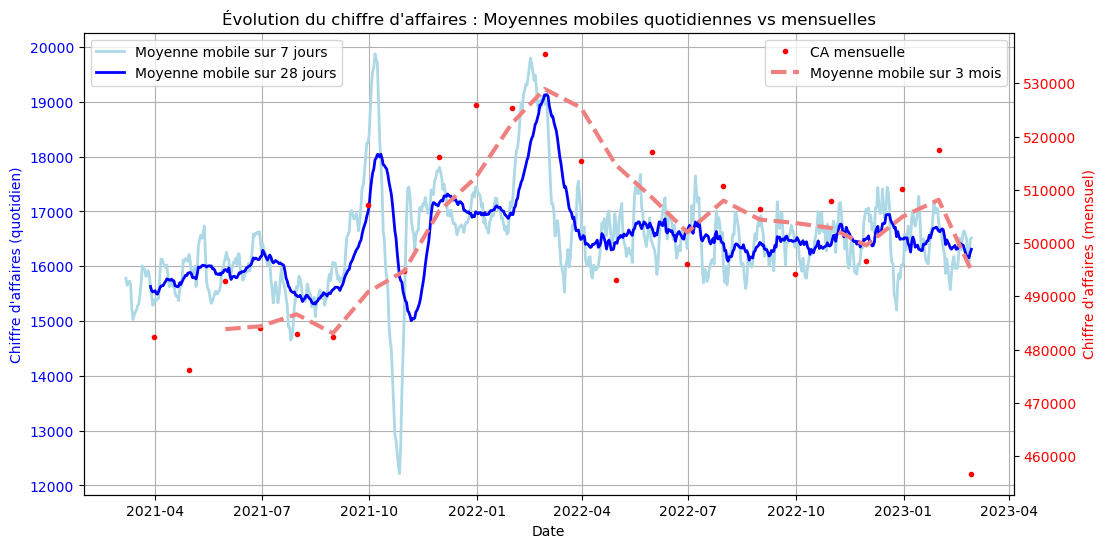

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel("Date")
ax1.set_ylabel("Chiffre d'affaires (quotidien)", color="blue")
ax1.plot(mm_7jours.index, mm_7jours, label="Moyenne mobile sur 7 jours", linewidth=2, color="lightblue")
ax1.plot(mm_28jours.index, mm_28jours, label="Moyenne mobile sur 28 jours", linewidth=2, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")


ax2 = ax1.twinx()
ax2.set_ylabel("Chiffre d'affaires (mensuel)", color="red")
ax2.plot(ca_mensuel.index, ca_mensuel, label="CA mensuelle", linestyle="None", marker="o", markersize= 3, color="red")
ax2.plot(mm_3mois.index, mm_3mois, label="Moyenne mobile sur 3 mois", linewidth=3, linestyle="dashed", color="lightcoral")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right")


plt.title("Évolution du chiffre d'affaires : Moyennes mobiles quotidiennes vs mensuelles")
ax1.grid(True)


plt.show()


In [27]:
ca_par_jour = df.groupby("nom_jour")["price"].sum().sort_values()
print(ca_par_jour)

nom_jour
Friday       1705630.14
Saturday     1707864.79
Wednesday    1709878.17
Thursday     1712845.47
Sunday       1717773.60
Tuesday      1734560.41
Monday       1739110.52
Name: price, dtype: float64


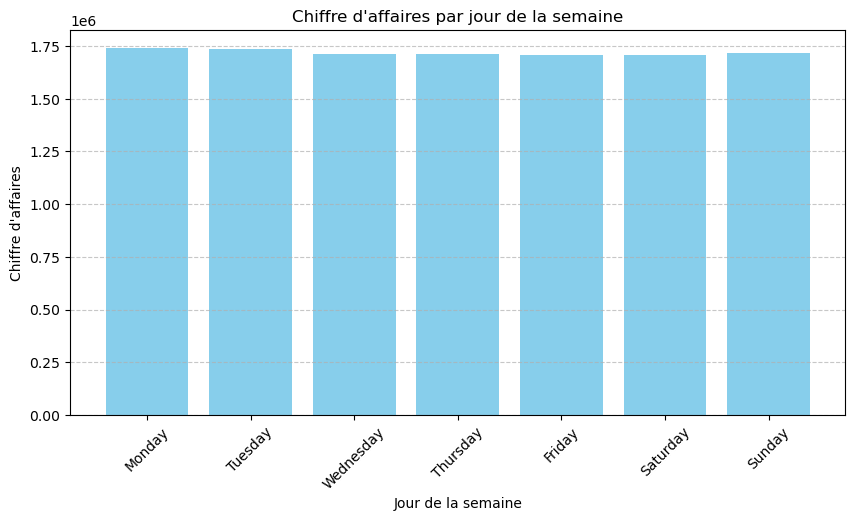

In [28]:

jours_ordre = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ca_par_jour = ca_par_jour.reindex(jours_ordre)

plt.figure(figsize=(10, 5))
plt.bar(ca_par_jour.index, ca_par_jour.values, color="skyblue")
plt.xlabel("Jour de la semaine")
plt.ylabel("Chiffre d'affaires")
plt.title("Chiffre d'affaires par jour de la semaine")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##### Il n'y a pas de difference notables de vente en fonction du jour de la semaine

### 2.2 :  Chiffre d'affaire par catégorie de produit

C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\2605316270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_cat, x="categ", y="price", palette="viridis")


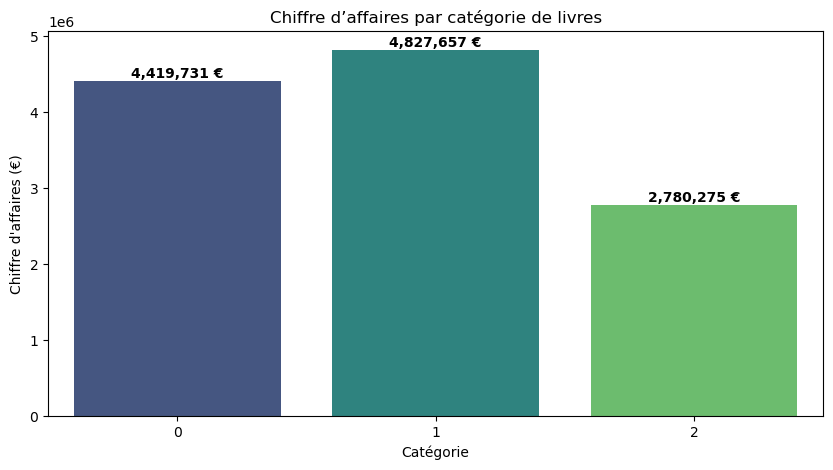

In [31]:
df_cat = df.groupby("categ")["price"].sum().reset_index()


plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_cat, x="categ", y="price", palette="viridis")
plt.xlabel("Catégorie")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Chiffre d’affaires par catégorie de livres")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height(),  
            f"{p.get_height():,.0f} €",  
            ha="center", 
            va="bottom",
            fontsize=10, 
            fontweight="bold", 
            color="black")
plt.show()


In [32]:
ca_quotidien_categ = df.groupby("categ").resample("D")["price"].sum()
ca_quotidien_categ

categ  date      
0      2021-03-01    6262.65
       2021-03-02    6718.27
       2021-03-03    6121.03
       2021-03-04    5891.48
       2021-03-05    5975.97
                      ...   
2      2023-02-24    3538.90
       2023-02-25    2767.95
       2023-02-26    3772.73
       2023-02-27    5271.62
       2023-02-28    3977.04
Name: price, Length: 2190, dtype: float64

In [33]:
ca_quotidien_categ_mm_28jours = ca_quotidien_categ.rolling(window=28).mean()
ca_quotidien_categ_mm_28jours

categ  date      
0      2021-03-01            NaN
       2021-03-02            NaN
       2021-03-03            NaN
       2021-03-04            NaN
       2021-03-05            NaN
                        ...     
2      2023-02-24    4262.661071
       2023-02-25    4172.297857
       2023-02-26    4083.904643
       2023-02-27    4122.361786
       2023-02-28    4066.982857
Name: price, Length: 2190, dtype: float64

In [34]:
ca_quotidien_categ = ca_quotidien_categ.reset_index()

In [35]:
ca_quotidien_categ_mm_28jours = ca_quotidien_categ_mm_28jours.reset_index()

In [36]:
ca_quotidien_categ_mm_28jours 

,categ,date,price
0,0,2021-03-01,NaN
1,0,2021-03-02,NaN
2,0,2021-03-03,NaN
3,0,2021-03-04,NaN
4,0,2021-03-05,NaN
...,...,...,...
2185,2,2023-02-24,4262.661071
2186,2,2023-02-25,4172.297857
2187,2,2023-02-26,4083.904643
2188,2,2023-02-27,4122.361786


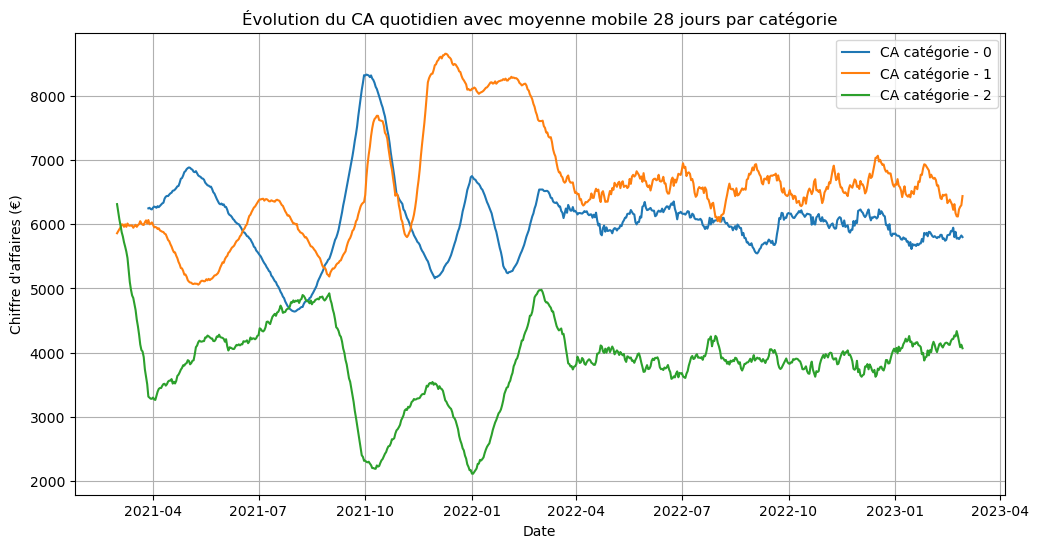

In [37]:
plt.figure(figsize=(12, 6))

for cat in ca_quotidien_categ_mm_28jours["categ"].unique():
    subset = ca_quotidien_categ_mm_28jours[ca_quotidien_categ_mm_28jours["categ"] == cat]

    plt.plot(subset["date"], subset["price"], label=f"CA catégorie - {cat}")
  
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Évolution du CA quotidien avec moyenne mobile 28 jours par catégorie")
plt.legend()
plt.grid(True)

plt.show()


### 2.3 : Nombre de clients par mois, transactions et volume.

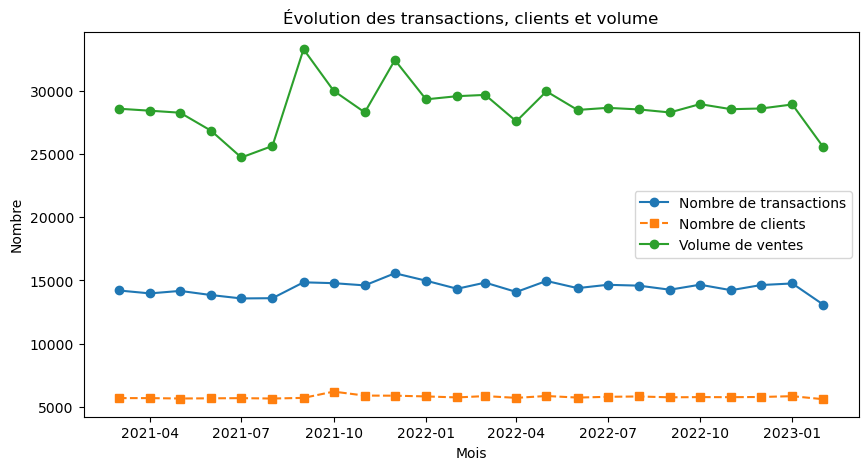

In [39]:
# Compter le nombre de clients et transactions par mois
df_tx = df.groupby("mois")["session_id"].nunique()
df_clients = df.groupby("mois")["client_id"].nunique()
df_ventes = df.groupby("mois")["id_prod"].count()

#convertion des period du dataframe en 
df_tx.index = df_tx.index.to_timestamp()
df_clients.index = df_clients.index.to_timestamp()
df_ventes.index = df_ventes.index.to_timestamp()
# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.plot(df_tx, label="Nombre de transactions", marker="o")
plt.plot(df_clients, label="Nombre de clients", marker="s", linestyle="dashed")
plt.plot(df_ventes, label="Volume de ventes", marker="o")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.title("Évolution des transactions, clients et volume")
plt.legend()
plt.show()

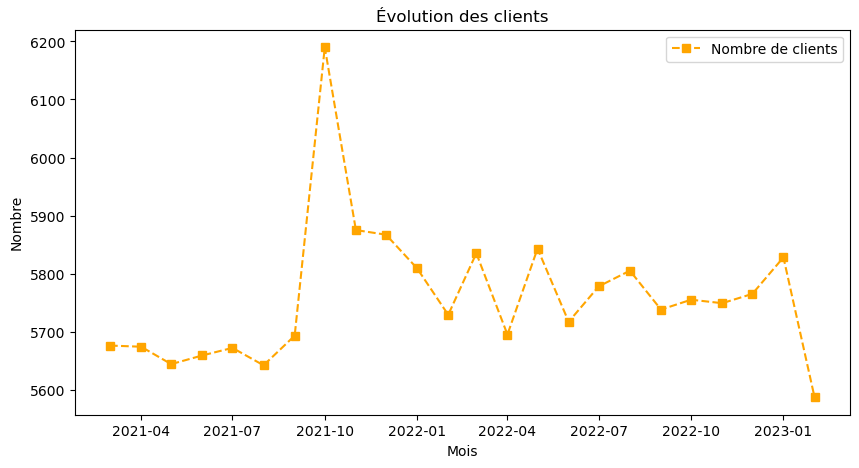

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(df_clients, label="Nombre de clients", marker="s", linestyle="dashed", color = "orange")
plt.xlabel("Mois")
plt.ylabel("Nombre")
plt.title("Évolution des clients")
plt.legend()
plt.show()

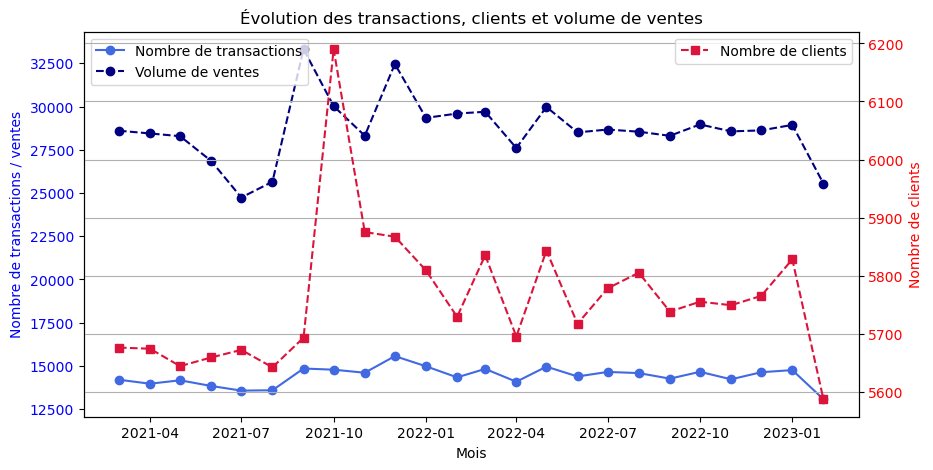

In [41]:
#graphique deux y1 et Y2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de transactions / ventes", color="blue")
ax1.plot(df_tx, label="Nombre de transactions", marker="o", color="royalblue")
ax1.plot(df_ventes, label="Volume de ventes", marker="o", linestyle="dashed", color="navy")
ax1.tick_params(axis="y", labelcolor="blue") 

ax2 = ax1.twinx()
ax2.set_ylabel("Nombre de clients", color="red")
ax2.plot(df_clients, label="Nombre de clients", marker="s", linestyle="dashed", color="crimson")
ax2.tick_params(axis="y", labelcolor="red") 

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Évolution des transactions, clients et volume de ventes")
plt.grid(True)

plt.show()


In [42]:
# si besoin pour changer le format de period a date 
# df["mois"] = df["mois"].dt.to_timestamp()

### 2.4 : Tops et Flops


In [44]:
#création nombre de ventes
top_flop = df.groupby(["id_prod", "categ"])["id_prod"].count().reset_index(name="nombre_ventes")
top_flop = top_flop.sort_values(by="nombre_ventes", ascending=False)
top_flop

,id_prod,categ,nombre_ventes
2591,1_369,1,2340
2644,1_417,1,2269
2641,1_414,1,2246
2733,1_498,1,2202
2653,1_425,1,2163
...,...,...,...
1792,0_549,0,1
2166,0_886,0,1
549,0_1498,0,1
1784,0_541,0,1


In [45]:
#le top 10 des ventes
top_10 = top_flop.head(10)
print(top_10)


     id_prod  categ  nombre_ventes
2591   1_369      1           2340
2644   1_417      1           2269
2641   1_414      1           2246
2733   1_498      1           2202
2653   1_425      1           2163
2629   1_403      1           2040
2640   1_413      1           2036
2639   1_412      1           2014
2632   1_406      1           2003
2633   1_407      1           2001


In [46]:
top_flop.head(475)

,id_prod,categ,nombre_ventes
2591,1_369,1,2340
2644,1_417,1,2269
2641,1_414,1,2246
2733,1_498,1,2202
2653,1_425,1,2163
...,...,...,...
79,0_1072,0,503
1766,0_525,0,500
154,0_1140,0,499
2998,1_736,1,498


In [47]:
#Le flop 50 des ventes
flop_50 = top_flop.tail(50)
print(flop_50)


     id_prod  categ  nombre_ventes
3189    2_28      2              3
3065   2_130      2              3
3066   2_131      2              3
1268  0_2149      0              3
41    0_1037      0              3
1999   0_735      0              3
884   0_1803      0              2
128   0_1116      0              2
3242    2_77      2              2
719   0_1653      0              2
2179   0_898      0              2
636   0_1576      0              2
601   0_1544      0              2
743   0_1675      0              2
959   0_1871      0              2
307   0_1279      0              2
1733   0_495      0              2
994   0_1902      0              2
3258    2_93      2              2
657   0_1595      0              2
2271   0_980      0              2
132   0_1120      0              2
589   0_1533      0              2
2752   1_514      1              2
1687   0_453      0              2
1387  0_2257      0              2
257   0_1233      0              2
2648   1_420      1 

In [48]:
top_flop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 2591 to 313
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_prod        3265 non-null   object
 1   categ          3265 non-null   int64 
 2   nombre_ventes  3265 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 102.0+ KB


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\2634057984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grouped, x="categ", y="nombre_ventes",palette="viridis")


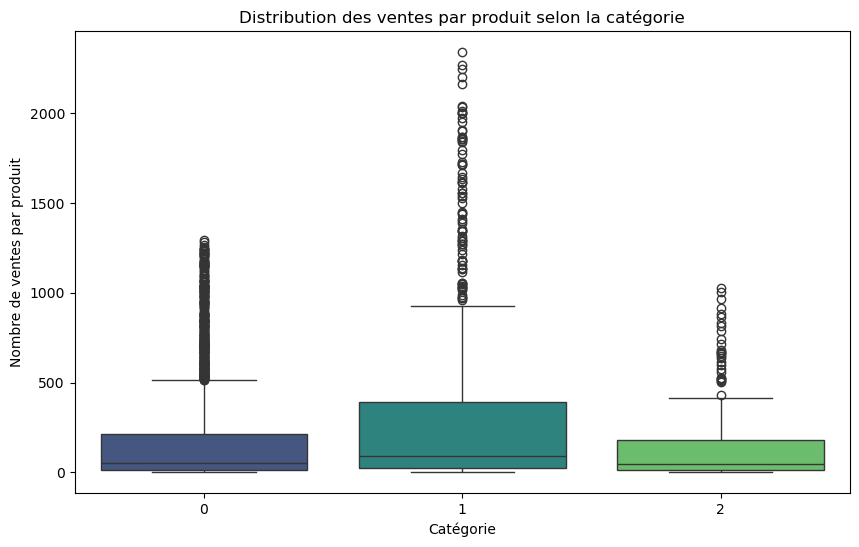

In [49]:
#visualisations large des tops par catégorie
df_grouped = df.groupby(["categ", "id_prod"])["id_prod"].count().reset_index(name="nombre_ventes")

df_grouped = df_grouped.sort_values("nombre_ventes", ascending=False)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped, x="categ", y="nombre_ventes",palette="viridis")

plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes par produit")
plt.title("Distribution des ventes par produit selon la catégorie")
plt.show()





### 2.5 Répartition par catégorie

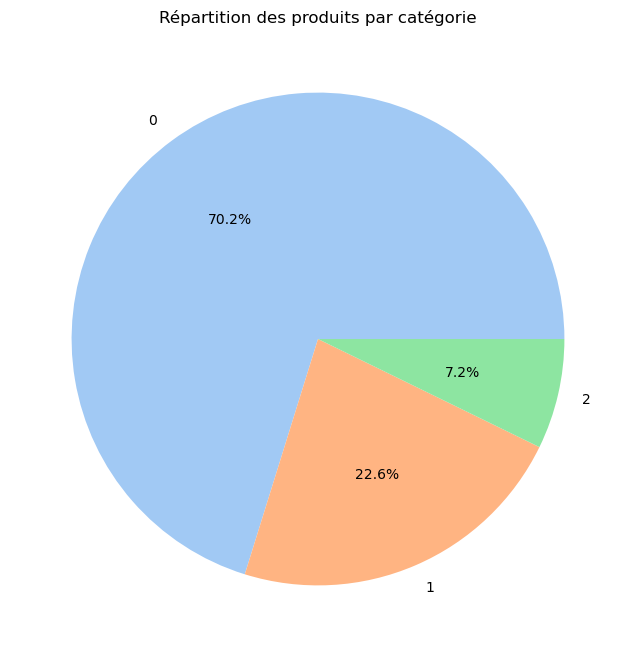

In [51]:


#nombre de produits par catégorie
produits_par_categ = df.groupby("categ")["id_prod"].nunique()

plt.figure(figsize=(8, 8))
plt.pie(produits_par_categ, labels=produits_par_categ.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Répartition des produits par catégorie")
plt.show()


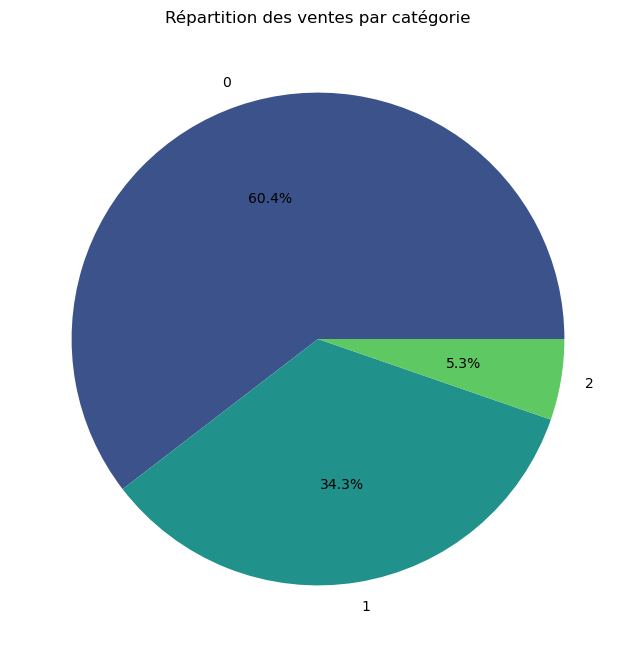

In [52]:
# nombre total de ventes par catégorie
ventes_par_categ = df.groupby("categ")["id_prod"].count()

#meme couleure que seaborn
categories = df["categ"].unique()
palette_viridis = sns.color_palette("viridis", len(categories))
palette_dict = dict(zip(categories, palette_viridis))

plt.figure(figsize=(8, 8))
plt.pie(ventes_par_categ, labels=ventes_par_categ.index, autopct="%1.1f%%", colors=[palette_dict[c] for c in ventes_par_categ.index])
plt.title("Répartition des ventes par catégorie")
plt.show()


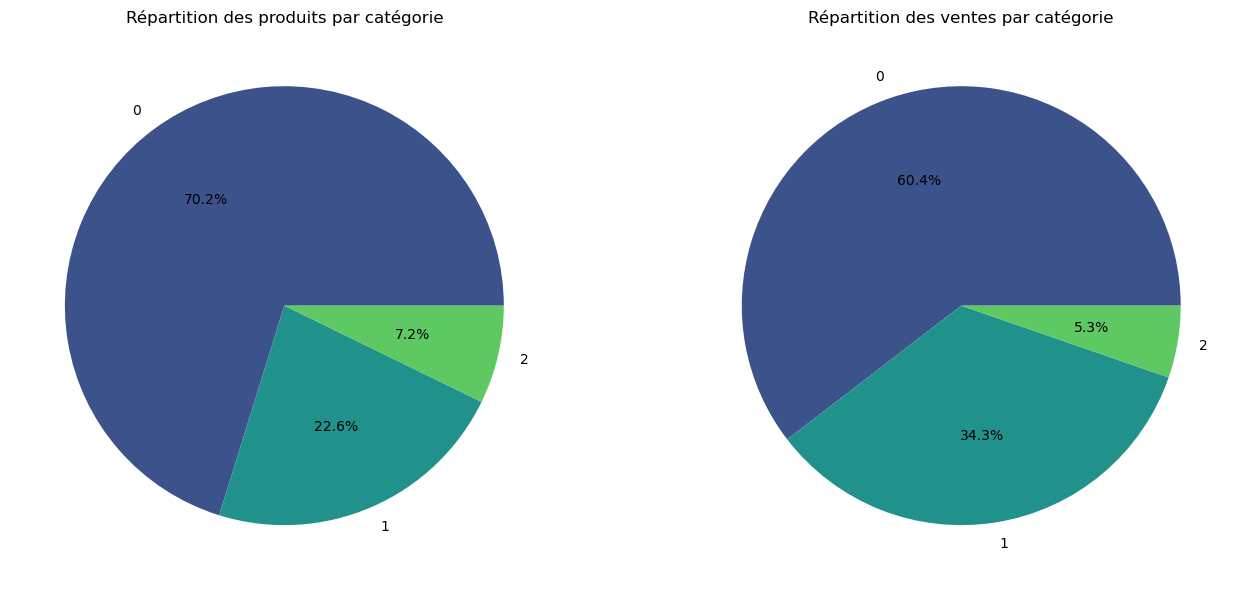

In [53]:
#graphique cote cote
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(produits_par_categ, labels=produits_par_categ.index, autopct="%1.1f%%", colors=[palette_dict[c] for c in ventes_par_categ.index])
axes[0].set_title("Répartition des produits par catégorie")

axes[1].pie(ventes_par_categ, labels=ventes_par_categ.index, autopct="%1.1f%%", colors=[palette_dict[c] for c in ventes_par_categ.index])
axes[1].set_title("Répartition des ventes par catégorie")

plt.tight_layout()
plt.show()


## 3 : Analyse des comportements clients

### 3.1 Répartition par client

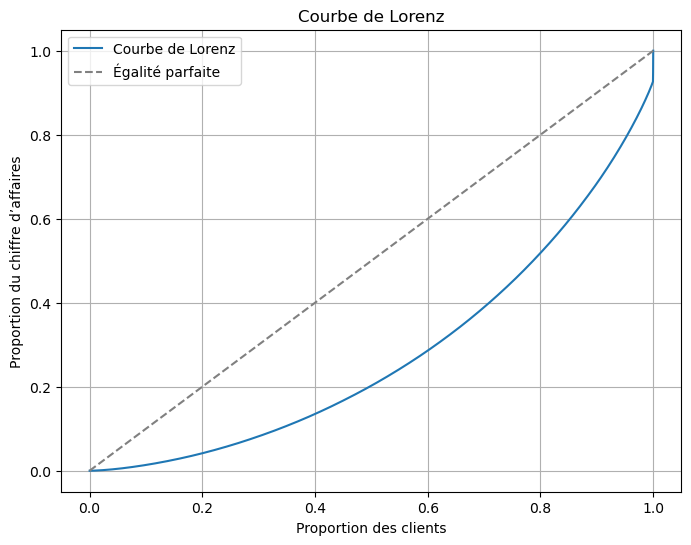

In [56]:


# Clients par revenu cumulé
df_clients = df.groupby("client_id")["price"].sum().sort_values().reset_index()
df_clients["revenu_cumule"] = df_clients["price"].cumsum() / df_clients["price"].sum()
df_clients["clients_cumule"] = np.arange(1, len(df_clients) + 1) / len(df_clients)

# Courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(df_clients["clients_cumule"], df_clients["revenu_cumule"], label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], linestyle="dashed", color="gray", label="Égalité parfaite")
plt.xlabel("Proportion des clients")
plt.ylabel("Proportion du chiffre d’affaires")
plt.title("Courbe de Lorenz")
plt.grid(True)
plt.legend()
plt.show()


#### Interprétation de la courbe de Lorenz :  la courbe de Lorenz est en dessous de la diagonale (droite d'égalité) nous sommes dans une situation d'inégalité. Une partie des clienst génère la majorité des revenus. 80% des clients apportent 50% du revenu et seulement 20% des clients la moitié restante.

In [58]:
Total_CA = df_clients["price"].sum()
print("Le CA total est de : ")
print(Total_CA)

top_10_clients = df_clients.tail(10)
print(top_10_clients)

Le CA total est de : 
12027663.100000001
     client_id      price  revenu_cumule  clients_cumule
8590    c_7959    5135.75       0.924300        0.998953
8591    c_7319    5155.77       0.924729        0.999070
8592    c_2899    5214.05       0.925163        0.999186
8593    c_2140    5260.18       0.925600        0.999302
8594    c_3263    5276.87       0.926039        0.999419
8595    c_1570    5285.82       0.926478        0.999535
8596    c_3454  114110.57       0.935965        0.999651
8597    c_6714  153918.60       0.948763        0.999767
8598    c_4958  290227.03       0.972892        0.999884
8599    c_1609  326039.89       1.000000        1.000000


#### 7.3% des revenus proviennent de 4 clients

In [60]:
# Répartition du CA si Pro si dépense > 10000
df_clients_b2b = df_clients[df_clients["price"] > 10000]
part_b2b = df_clients_b2b["price"].sum() / df_clients["price"].sum()
print("Part du chiffre d'affaires B2B :", round(part_b2b * 100, 2), "%")

Part du chiffre d'affaires B2B : 7.35 %


### 3.2 Genre des clients et catégories de livres achetés

Objectif : voir si certaines catégories sont achetées différemment selon le genre (homme/femme)

Type de variables :

sex = variable catégorielle (qualitative)

categ =  variable catégorielle (qualitative)

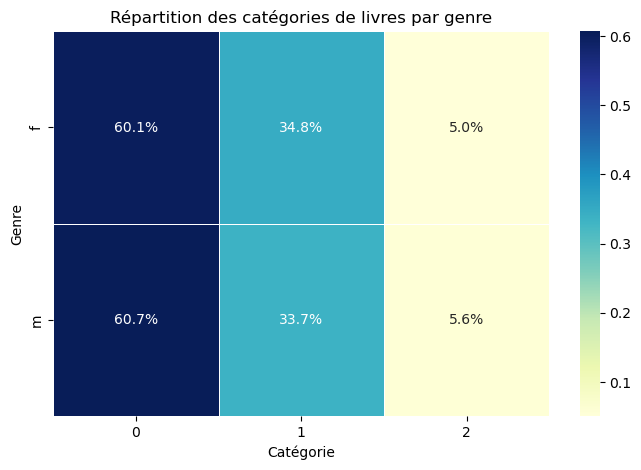

In [63]:
#Visualtion de la data

# Tableau croisé genre / catégorie
genre_cat = pd.crosstab(df["sex"], df["categ"], normalize="index")  # en %

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(genre_cat, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=0.5)
plt.title("Répartition des catégories de livres par genre")
plt.xlabel("Catégorie")
plt.ylabel("Genre")
plt.show()


In [64]:

from scipy.stats import chi2_contingency

# Tableau de contingence
table = pd.crosstab(df["sex"], df["categ"])

# Test du Khi2
chi2, p, dof, expected = chi2_contingency(table)

print("Statistique de test :", chi2)
print("p-value :", p.round(4))
print("Degrés de liberté :", dof)

print("Fréquence attentdues : ")
print(expected)

print("Fréquence réelles:")
print(table)

Statistique de test : 158.25417617304882
p-value : 0.0
Degrés de liberté : 2
Fréquence attentdues : 
[[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]
Fréquence réelles:
categ       0       1      2
sex                         
f      206103  119307  17283
m      209356  116285  19200


H0 : Le genre du client n'a aucun effet sur les catégories de livres achetés (les deux cvariables sont indépendentes)

H1 : Le genre du client a un effet significatif sur les catégories de livres achetés (les deux variables sont dépendentes)

Chi-2 = 158.25 => écart entre fréquences observées et fréquences attendues(si variables étaient indépendentes), plus cette variable est grande plus on a de chance de rejeter H0.

p = 0.0 < 0.05 il y a très peux de chance que les différencesobservées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle => le genre influence significativement les catégories de livres achetés

## 3.3 Age des clients et montant total des achats

Objectif :
Voir si les clients plus âgés achètent plus (ou moins).

Type de variables :

age = variable quantitative

revenu_total = somme des achats par client (quantitative)

Test statistique :

Corrélation de Pearson (ou Spearman si non linéaire)

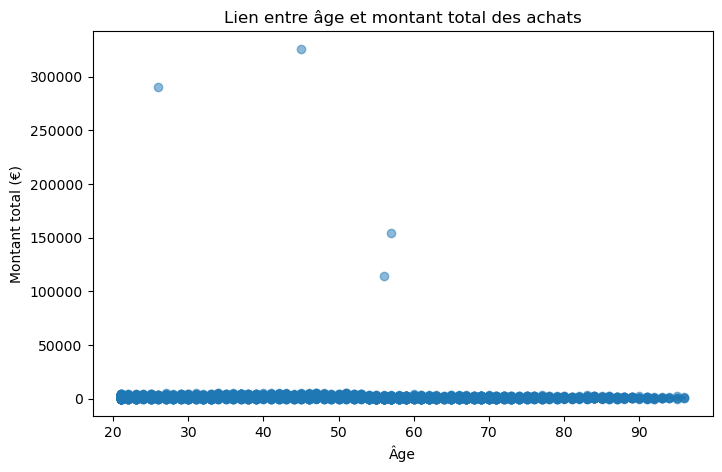

In [68]:
#visualisation data
revenu_age = df.groupby(["client_id","age"])["price"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.regplot(data=revenu_age, x="age", y="price", scatter_kws={"alpha":0.5})
plt.title("Lien entre âge et montant total des achats")
plt.xlabel("Âge")
plt.ylabel("Montant total (€)")
plt.show()


j'ai 4 gros outliers, je vais partir sur Spaerman qui est moins sensible aux outliers

In [70]:
from scipy.stats import pearsonr, spearmanr


# Pearson (linéaire)
#r, p = pearsonr(revenu_age["age"], revenu_age["price"])
#print("Corrélation de Pearson :", r, "p-value :", p)

# Si relation non linéaire :
r, p = spearmanr(revenu_age["age"], revenu_age["price"])
print("Corrélation de Spearman :", r, "p-value :", p.round(4))


Corrélation de Spearman : -0.18437931323303366 p-value : 0.0


H0 : il n'y a aucune corrélation entre l'age des clients et le montant total de leurs achats

H1 : il existe une corrélation significative entre l'âge des clients et le moment total de leurs achats

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle 

Spearman = -0.18 => le coéfficient est très faible nous sommes dans une situation d'absence de corrélation.

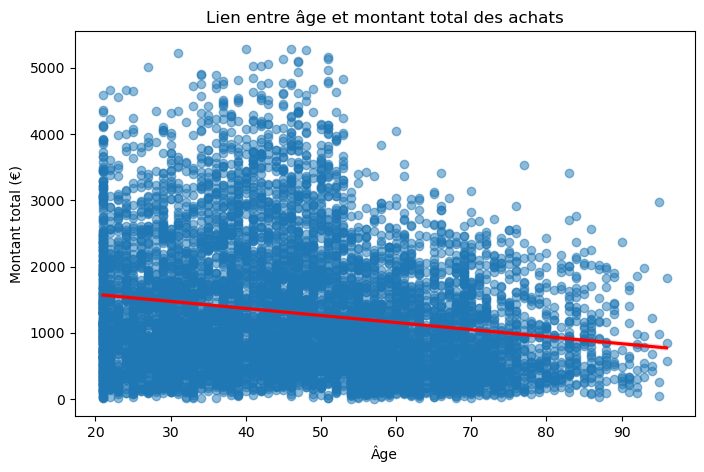

In [72]:
#visualisation avec nettoyage données
revenu_age_clean = revenu_age[revenu_age["price"]<100000]
plt.figure(figsize=(8, 5))
sns.regplot(data=revenu_age_clean, x="age", y="price", scatter_kws={"alpha":0.5}, line_kws = dict(color="r"))
plt.title("Lien entre âge et montant total des achats")
plt.xlabel("Âge")
plt.ylabel("Montant total (€)")
plt.show()

In [73]:
r, p = spearmanr(revenu_age_clean["age"], revenu_age_clean["price"])
print("Corrélation de Spearman :", r, "p-value :", p.round(4))

Corrélation de Spearman : -0.18453804793783096 p-value : 0.0


les résultats de la corrélation de spearman sont très similaires avec ou sans les outliers


## 3.3.bis Exploration en vu d'un test de Person, test de normalité

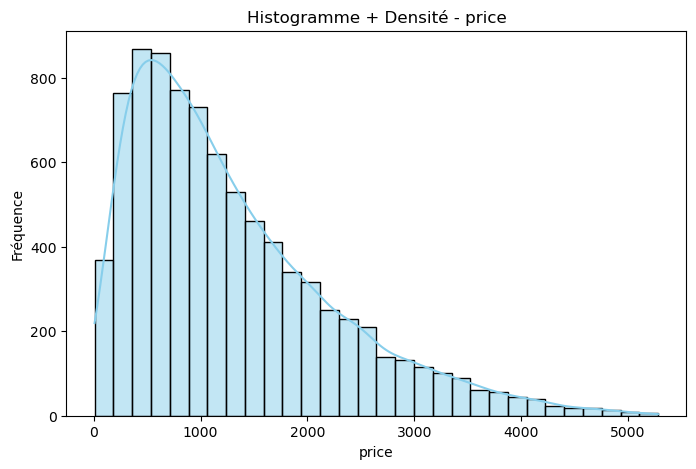

In [76]:
#visualisation puis test de normalité en vu d'essayer Pearson
plt.figure(figsize=(8, 5))
sns.histplot(revenu_age_clean["price"], kde=True, bins=30, color="skyblue")
plt.title("Histogramme + Densité - price")
plt.xlabel("price")
plt.ylabel("Fréquence")
plt.show()

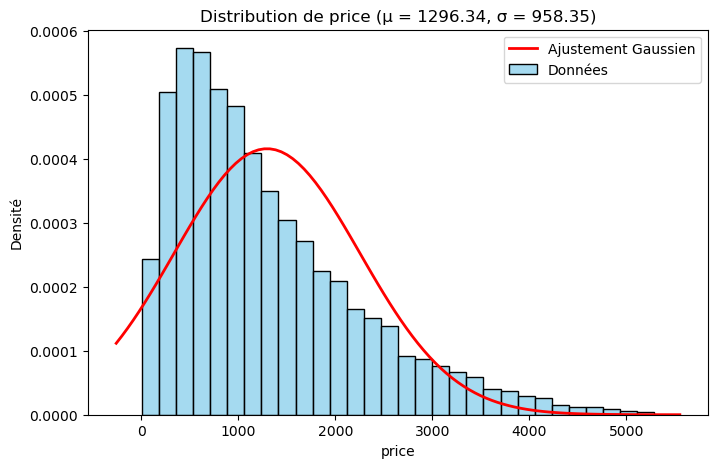

In [77]:
from scipy.stats import norm

# Données
data = revenu_age_clean["price"]

# Calcul des paramètres de la loi normale
mu, std = norm.fit(data)

# Histogramme des données 
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=False, stat='density', color="skyblue", label='Données')

# Courbe de densité gaussienne
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Ajustement Gaussien')

plt.title(f"Distribution de price (μ = {mu:.2f}, σ = {std:.2f})")
plt.xlabel("price")
plt.ylabel("Densité")
plt.legend()
plt.show()


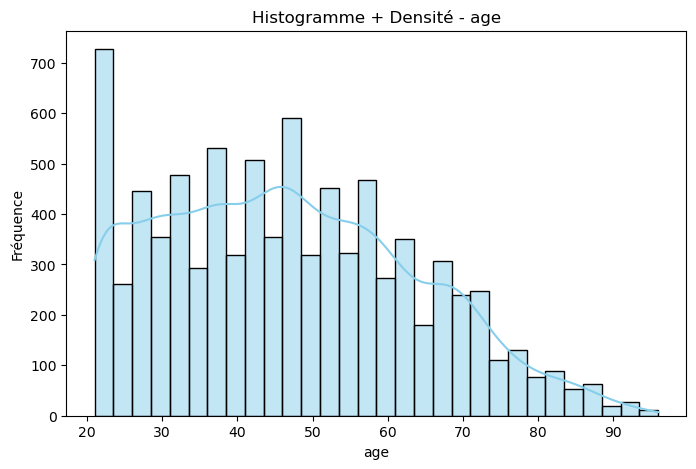

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(revenu_age_clean["age"], kde=True, bins=30, color="skyblue")
plt.title("Histogramme + Densité - age")
plt.xlabel("age")
plt.ylabel("Fréquence")
plt.show()

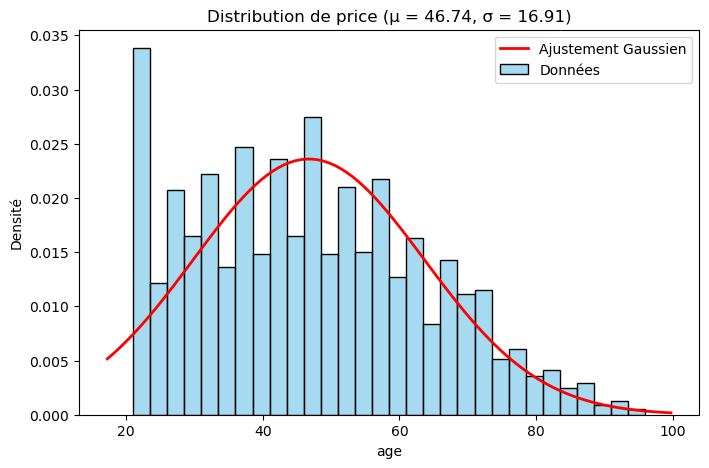

In [79]:
# Données
data = revenu_age_clean["age"]

# Calcul des paramètres de la loi normale
mu, std = norm.fit(data)

# Histogramme des données 
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=False, stat='density', color="skyblue", label='Données')

# Courbe de densité gaussienne
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Ajustement Gaussien')

plt.title(f"Distribution de price (μ = {mu:.2f}, σ = {std:.2f})")
plt.xlabel("age")
plt.ylabel("Densité")
plt.legend()
plt.show()

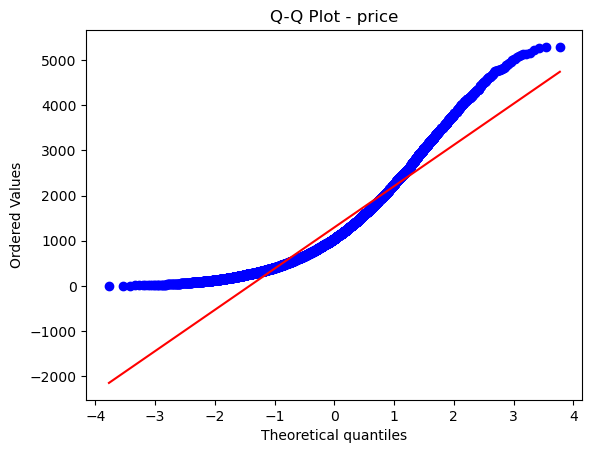

In [80]:
import scipy.stats as stats
stats.probplot(revenu_age_clean["price"], dist="norm", plot=plt)
plt.title("Q-Q Plot - price")
plt.show()

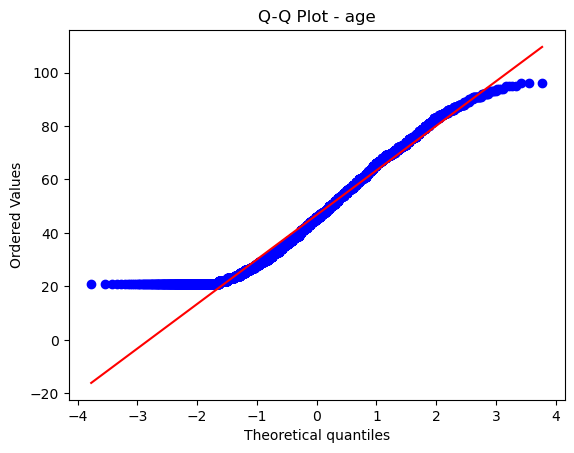

In [81]:
stats.probplot(revenu_age_clean["age"], dist="norm", plot=plt)
plt.title("Q-Q Plot - age")
plt.show()

In [82]:
#revenu_age_clean comporte 8596 lignes :
#si <5000 alors test de normalité Shapiro-Wilk
#from scipy.stats import shapiro

# Test de normalité pour age
#stat_age, p_age = shapiro(revenu_age_clean["age"])
#print(f"Shapiro - age: p-value = {p_age:.4f}")

# Test de normalité pour price
#stat_price, p_price = shapiro(revenu_age_clean["price"])
#print(f"Shapiro - price: p-value = {p_price:.4f}")

#si >5000 lignes normaltest :

from scipy.stats import normaltest

# Test D’Agostino-Pearson
stat_age, p_age = normaltest(revenu_age_clean["age"])
print(f"Normaltest - age: p-value = {p_age:.4f}")

stat_price, p_price = normaltest(revenu_age_clean["price"])
print(f"Normaltest - price: p-value = {p_price:.4f}")



Normaltest - age: p-value = 0.0000
Normaltest - price: p-value = 0.0000


La valeur de p est inferieur à 0.05 la variable age et la variable price nesuivent pas une loi normale

Une corrélation de Person aurait pu etre possible si les deux variables étaient normales. Elles ne le sont pas. Le choix de partir sur une corrélation de Spearman etait le bon.


## 3.4 Age des clients et fréquence d'achats

Objectif : Voir si les clients jeunes ou les plus âgés achètent plus souvent.

Type de variables :

age = variable quantitative

freq_achat = nombre de session d'achat par client (quantitative)

Test statistique :

Corrélation de Pearson (ou Spearman si non linéaire) => la variable age ne suit pas une loi normale, nous feront un test de spearman

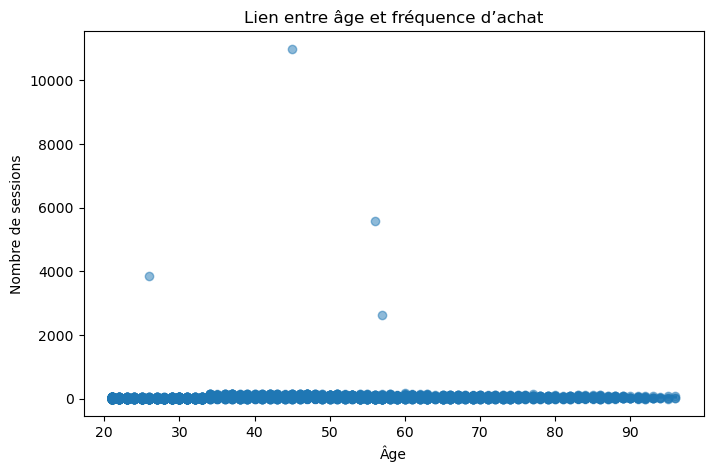

In [86]:
#visualisation data
freq_age = df.groupby(["client_id","age"])["session_id"].nunique().reset_index()

# Scatter plot
plt.figure(figsize=(8, 5))
sns.regplot(data=freq_age, x="age", y="session_id", scatter_kws={"alpha":0.5})
plt.title("Lien entre âge et fréquence d’achat")
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
plt.show()


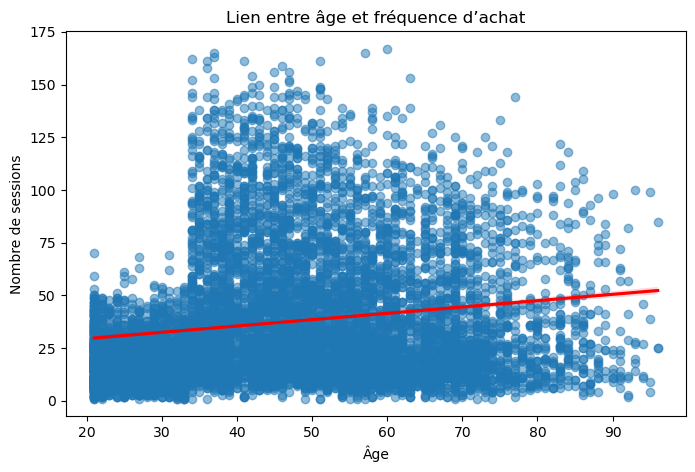

In [87]:
freq_age_clean = freq_age[freq_age["session_id"]<2000]

plt.figure(figsize=(8, 5))
sns.regplot(data=freq_age_clean, x="age", y="session_id", scatter_kws={"alpha":0.5},line_kws = dict(color="r"))
plt.title("Lien entre âge et fréquence d’achat")
plt.xlabel("Âge")
plt.ylabel("Nombre de sessions")
plt.show()

C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\4204493266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=freq_achat, x="tranche_age", y = "session_id" , palette="pastel")


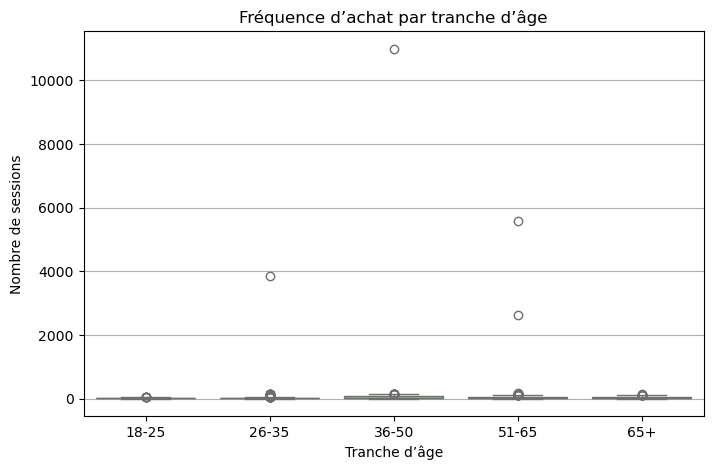

In [88]:


# fréquence d’achat (nombre de sessions différentes)
freq_achat = df.groupby(["client_id","age"])["session_id"].nunique().reset_index()

# tranches d'âge
bins = [18, 25, 35, 50, 65, 100]
labels = ["18-25", "26-35", "36-50", "51-65", "65+"]
freq_achat["tranche_age"] = pd.cut(freq_achat["age"], bins=bins, labels=labels)

# boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=freq_achat, x="tranche_age", y = "session_id" , palette="pastel")
plt.title("Fréquence d’achat par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de sessions")
plt.grid(axis='y')
plt.show()


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\628972792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_age_clean["tranche_age"] = pd.cut(freq_age_clean["age"], bins=bins, labels=labels)
C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\628972792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=freq_age_clean, x="tranche_age", y="session_id", palette="pastel")


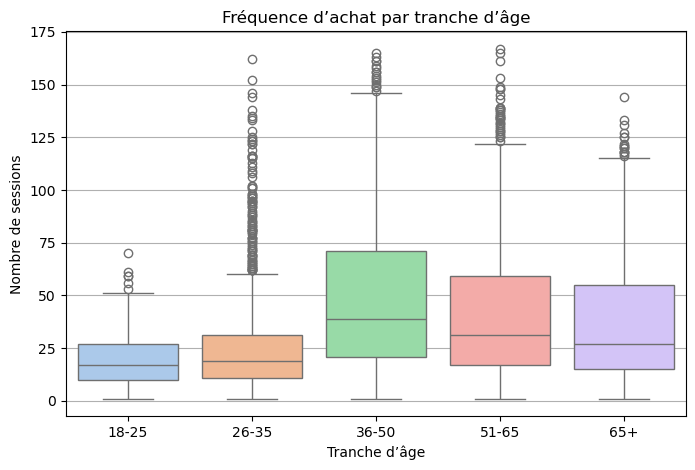

In [89]:

#Création des tranches d'âge
bins = [18, 25, 35, 50, 65, 100]
labels = ["18-25", "26-35", "36-50", "51-65", "65+"]
freq_age_clean["tranche_age"] = pd.cut(freq_age_clean["age"], bins=bins, labels=labels)

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=freq_age_clean, x="tranche_age", y="session_id", palette="pastel")
plt.title("Fréquence d’achat par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de sessions")
plt.grid(axis='y')
plt.show()


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1036960849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_age_clean["tranche_age"] = pd.cut(freq_age_clean["age"], bins=bins, labels=labels)
C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1036960849.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=freq_age_clean, x="tranche_age", y="session_id", palette="pastel")


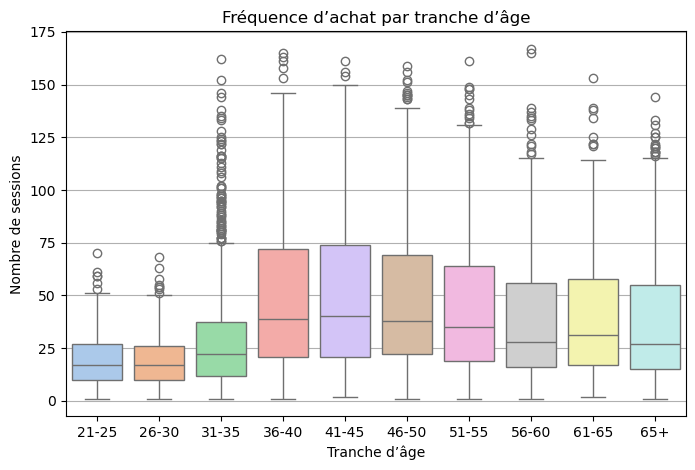

In [90]:
#Création les tranches d'âge
bins = [20, 25, 30, 35, 40, 45, 50, 55,60,65,100]
labels = ["21-25","26-30","31-35","36-40","41-45","46-50","51-55","56-60","61-65", "65+"]
freq_age_clean["tranche_age"] = pd.cut(freq_age_clean["age"], bins=bins, labels=labels)

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=freq_age_clean, x="tranche_age", y="session_id", palette="pastel")
plt.title("Fréquence d’achat par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Nombre de sessions")
plt.grid(axis='y')
plt.show()

In [91]:


# Spearman
r, p = spearmanr(freq_age["age"], freq_age["session_id"])
print("Corrélation âge  fréquence :", r, "p-value :", p.round(4))


Corrélation âge  fréquence : 0.21176722196238146 p-value : 0.0


H0 : il n'y a aucune corrélation entre l'age des clients et la fréquence de leurs achats

H1 : il existe une corrélation significative entre l'âge des clients et la fréquence de leurs achats

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle

Spearman = 0.21 => le coéfficient est faible, il y a une faible corrélation positive entre l'age et la fréquence d'achats.

## 3.4 bis Test par tranche d'age

In [94]:
from scipy.stats import kruskal

# Groupes par tranche d’âge
groupes = [group["session_id"].values for name, group in freq_age_clean.groupby("tranche_age")]

# Test de Kruskal-Wallis
stat, p = kruskal(*groupes)
print("Statistique de Kruskal =", stat)
print("p-value =", p.round(4))
if p < 0.05:
    print("→ Il existe une différence significative entre les tranches d’âge.")
else:
    print("→ Aucune différence significative entre les tranches d’âge.")

Statistique de Kruskal = 1204.993348974957
p-value = 0.0
→ Il existe une différence significative entre les tranches d’âge.


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\4209303032.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = [group["session_id"].values for name, group in freq_age_clean.groupby("tranche_age")]


H0 : La distribution de la fréquence d’achat est la même dans toutes les tranches d’âge.

H1 : Au moins une tranche d’âge a une distribution différente.

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle.

il y a des différence entre les groupes d'age. Avec un score de 1204, il y a un grande différence entre les groupes.

## 3.4 Ter Test avec tranche d'age et ANOVA

In [97]:
from scipy.stats import shapiro, levene, f_oneway

# Suppression des lignes avec des valeurs manquantes
df_anova = freq_age_clean.dropna(subset=["session_id", "tranche_age"])

# 1. Vérification au moins 2 groupes
groupes = df_anova["tranche_age"].unique()
print("Tranches d’âge présentes :", groupes)

if len(groupes) < 2:
    print(" Pas assez de groupes pour faire une ANOVA.")
else:
    # 2. Test de normalité dans chaque groupe (Shapiro)
    print("\n Test de normalité (Shapiro-Wilk) par groupe :")
    normalite_ok = True
    for name, group in df_anova.groupby("tranche_age"):
        stat, p = shapiro(group["session_id"])
        print(f"{name} → p-value : {p:.4f}")
        if p < 0.05:
            normalite_ok = False

    # 3. Test d’égalité des variances (Levene)
    groupes_valeurs = [group["session_id"].values for name, group in df_anova.groupby("tranche_age")]
    stat_levene, p_levene = levene(*groupes_valeurs)
    print(f"\n Test de Levene (variances égales) → p-value : {p_levene:.4f}")
    variances_ok = p_levene >= 0.05

    # 4. Lancer l'ANOVA si conditions remplies
    if normalite_ok and variances_ok:
        stat_anova, p_anova = f_oneway(*groupes_valeurs)
        print(f"\n✅ ANOVA lancée : Statistique F = {stat_anova:.4f}, p-value = {p_anova:.4f}")
        if p_anova < 0.05:
            print("→ Il y a une différence significative entre les tranches d’âge.")
        else:
            print("→ Aucune différence significative entre les tranches d’âge.")
    else:
        print("\n Conditions non remplies pour une ANOVA classique.")
        print(" Utilise plutôt un test de Kruskal-Wallis (non paramétrique).")


Tranches d’âge présentes : ['65+', '31-35', '56-60', '41-45', '51-55', '46-50', '21-25', '26-30', '36-40', '61-65']
Categories (10, object): ['21-25' < '26-30' < '31-35' < '36-40' ... '51-55' < '56-60' < '61-65' < '65+']

 Test de normalité (Shapiro-Wilk) par groupe :
21-25 → p-value : 0.0000
26-30 → p-value : 0.0000
31-35 → p-value : 0.0000
36-40 → p-value : 0.0000
41-45 → p-value : 0.0000
46-50 → p-value : 0.0000
51-55 → p-value : 0.0000
56-60 → p-value : 0.0000
61-65 → p-value : 0.0000
65+ → p-value : 0.0000

 Test de Levene (variances égales) → p-value : 0.0000

 Conditions non remplies pour une ANOVA classique.
 Utilise plutôt un test de Kruskal-Wallis (non paramétrique).


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1520218939.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_anova.groupby("tranche_age"):
C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1520218939.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes_valeurs = [group["session_id"].values for name, group in df_anova.groupby("tranche_age")]


## 3.5 Age des clients et taille du panier moyen

Objectif :

Le panier moyen varie-t-il avec l’âge ?

Variables :

panier_moyen = total des achats ÷ nb de sessions = quantitatif

age = quantitative

Test :

Corrélation de Pearson ou Spearman => Spearman car age n'est pas normal

In [100]:
freq_achat = df.groupby(["client_id","age"])["session_id"].nunique().reset_index()

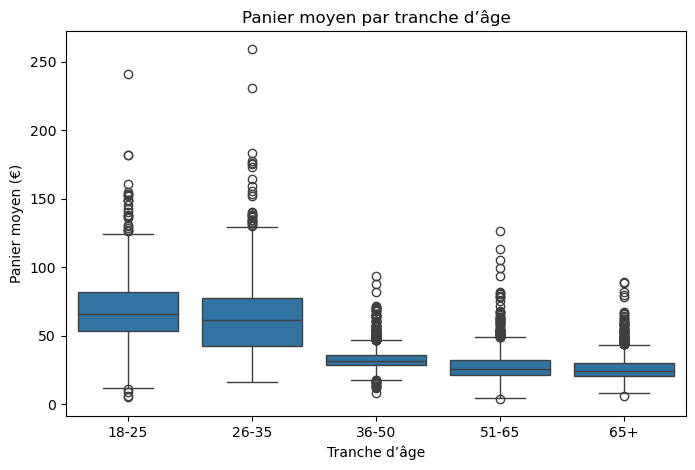

In [101]:
#Visualisation 
df_panier = df.groupby(["client_id","age"]).agg({"price": "sum","session_id": pd.Series.nunique}).reset_index()

df_panier["panier_moyen"] = df_panier["price"] / df_panier["session_id"]

#tranches d’âge
df_panier["tranche_age"] = pd.cut(df_panier["age"], bins=[18,25,35,50,65,100], labels=["18-25", "26-35", "36-50", "51-65", "65+"])

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_panier, x="tranche_age", y="panier_moyen")
plt.title("Panier moyen par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Panier moyen (€)")
plt.show()


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\1630911349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_panier, x="tranche_age", y="panier_moyen",palette="pastel")


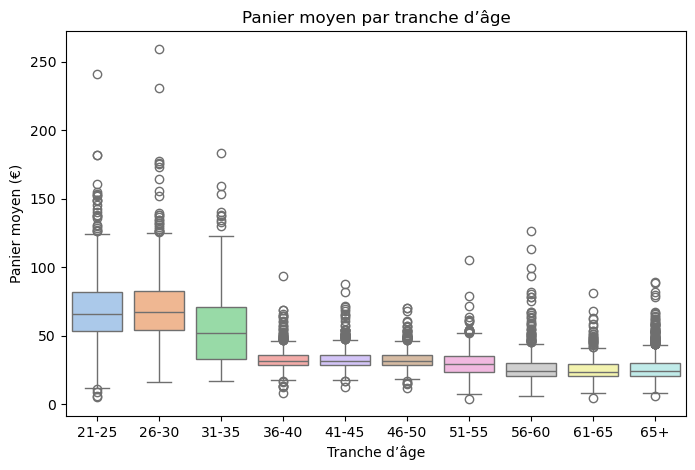

In [102]:
bins = [20, 25, 30, 35, 40, 45, 50, 55,60,65,100]
labels = ["21-25","26-30","31-35","36-40","41-45","46-50","51-55","56-60","61-65", "65+"]
df_panier["tranche_age"] = pd.cut(df_panier["age"], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_panier, x="tranche_age", y="panier_moyen",palette="pastel")
plt.title("Panier moyen par tranche d’âge")
plt.xlabel("Tranche d’âge")
plt.ylabel("Panier moyen (€)")
plt.show()


In [103]:


# Corrélation
r, p = spearmanr(df_panier["age"], df_panier["panier_moyen"])
print("Corrélation âge ↔ panier moyen :", r, "p-value :", p)


Corrélation âge ↔ panier moyen : -0.7004398957899804 p-value : 0.0


H0 il n'y a aucune corrélation entre l'age des clients et leur panier moyen

H1 il existe une corélation significative entre l'age des clients et leur panier moyen

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle

Spearman = -0.70 => le coéfficient est moyennement négatif, il y a une corrélation moyenne négative entre l'age et le panier moyen


## 3.5 bis Test par tranche d'age

In [106]:
# Groupes par tranche d’âge
groupes = [group["panier_moyen"].values for name, group in df_panier.groupby("tranche_age")]

# Test de Kruskal-Wallis
stat, p = kruskal(*groupes)
print("Statistique de Kruskal =", stat)
print("p-value =", p.round(4))
if p < 0.05:
    print("→ Il existe une différence significative entre les tranches d’âge.")
else:
    print("→ Aucune différence significative entre les tranches d’âge.")

Statistique de Kruskal = 4650.515762819723
p-value = 0.0
→ Il existe une différence significative entre les tranches d’âge.


C:\Users\gabry\AppData\Local\Temp\ipykernel_51636\2902452183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupes = [group["panier_moyen"].values for name, group in df_panier.groupby("tranche_age")]


H0 : La distribution de la fréquence d’achat est la même dans toutes les tranches d’âge.

H1 : Au moins une tranche d’âge a une distribution différente.

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle.

il y a des différence entre les groupes d'age. Avec un score de 4650, il y a un grande différence entre les groupes.

## 3.6 Age des clients et catégorie des livres achetés

Objectif :

Identifier si certaines tranches d’âge achètent plus certains types de livres.

Variables :

age = quantitative => transformé en variable catégorielle (qualitative) avec les tranches d'ages

categ = catégorielle

Approche :
Découper l'âge en tranches, puis appliquer test du Khi²

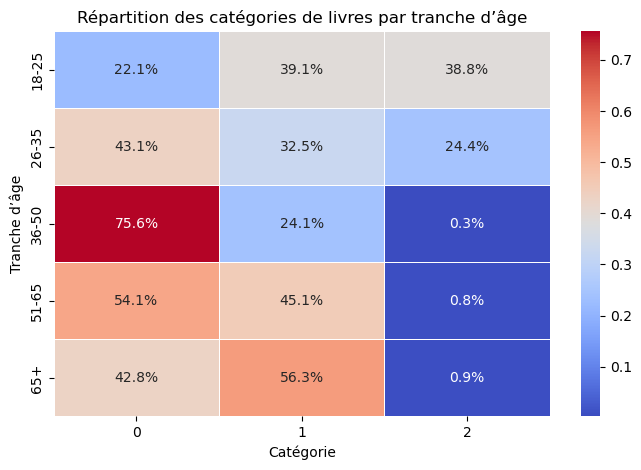

In [110]:
#Visualisation
# tranches ages
df["tranche_age"] = pd.cut(df["age"], bins=[18,25,35,50,65,100], labels=["18-25", "26-35", "36-50", "51-65", "65+"])

# Tableau croisé
age_cat = pd.crosstab(df["tranche_age"], df["categ"], normalize="index")

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(age_cat, annot=True, cmap="coolwarm", fmt=".1%", linewidths=0.5)
plt.title("Répartition des catégories de livres par tranche d’âge")
plt.xlabel("Catégorie")
plt.ylabel("Tranche d’âge")
plt.show()


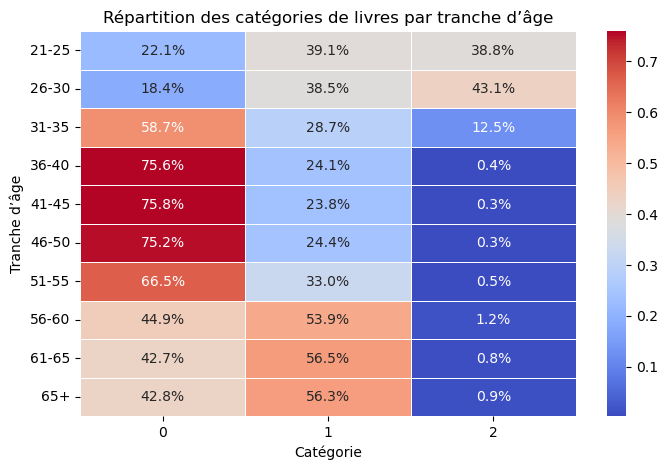

In [111]:
#tranche age precis
bins = [20, 25, 30, 35, 40, 45, 50, 55,60,65,100]
labels = ["21-25","26-30","31-35","36-40","41-45","46-50","51-55","56-60","61-65", "65+"]
df["tranche_age"] = pd.cut(df["age"], bins=bins, labels=labels)

# Tableau croisé
age_cat = pd.crosstab(df["tranche_age"], df["categ"], normalize="index")

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(age_cat, annot=True, cmap="coolwarm", fmt=".1%", linewidths=0.5)
plt.title("Répartition des catégories de livres par tranche d’âge")
plt.xlabel("Catégorie")
plt.ylabel("Tranche d’âge")
plt.show()

In [112]:
# Tableau croisé
table_age_categ = pd.crosstab(df["tranche_age"], df["categ"])

# Test du Khi2
chi2, p, _, _ = chi2_contingency(table_age_categ)

print("Test Khi2 tranche d'âge par catégorie :", chi2, "p-value :", p.round(4))
print("Degrés de liberté :", dof)

print("Fréquence attentdues : ")
print(expected)

print("Fréquence réelles:")
print(table_age_categ)

Test Khi2 tranche d'âge par catégorie : 258551.87871223292 p-value : 0.0
Degrés de liberté : 2
Fréquence attentdues : 
[[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]
Fréquence réelles:
categ            0      1      2
tranche_age                     
21-25         7431  13135  13040
26-30         5938  12396  13893
31-35        29936  14640   6396
36-40        75571  24060    367
41-45        98017  30821    408
46-50        79629  25851    357
51-55        47663  23672    356
56-60        25721  30909    708
61-65        13230  17528    259
65+          32323  42580    699


H0 : La tranche d'age du client n'a aucune influence sur les catégories de livres achetés (les deux variables sont indépendentes)

H1 : La tranche d'age du client a une influence significative sur les catégories de livres achetés (les deux variables sont dépendentes)

Chi-2 = 258551 => écart entre fréquences observées et fréquences attendues(si variables étaient indépendentes), plus cette variable est grande plus on a de chance de rejeter H0.

p = 0.0 < 0.05 il y a très peux de chance que les différences observées soient dues au hasard. Nous pouvons rejeter l'hypothèse nulle => la tranche d'age influence significativement les catégories de livres achetés

## 3.7 Répartition chiffre d'affaire clients B2B

In [115]:
df_clients

,client_id,price,revenu_cumule,clients_cumule
0,c_8351,6.31,5.246239e-07,0.000116
1,c_8140,8.30,1.214700e-06,0.000233
2,c_8114,9.98,2.044454e-06,0.000349
3,c_4648,11.20,2.975640e-06,0.000465
4,c_4478,13.36,4.086413e-06,0.000581
...,...,...,...,...
8595,c_1570,5285.82,9.264781e-01,0.999535
8596,c_3454,114110.57,9.359655e-01,0.999651
8597,c_6714,153918.60,9.487625e-01,0.999767
8598,c_4958,290227.03,9.728925e-01,0.999884


In [116]:
# Répartition du CA
df_clients_b2b = df_clients[df_clients["price"] > 10000]
part_b2b = df_clients_b2b["price"].sum() / df_clients["price"].sum()
print("Part du chiffre d'affaires B2B :", round(part_b2b * 100, 2), "%")


Part du chiffre d'affaires B2B : 7.35 %
